In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Convolution2D, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input 
from keras.optimizers import SGD 
np.random.seed(44)
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
#gpu configer
from tensorflow.python.client import device_lib
from keras.layers import BatchNormalization
#device_lib.list_local_devices()


In [51]:
print(tf.test.gpu_device_name())

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) #max: 1 gpu, 56 cpu




/device:GPU:0


X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


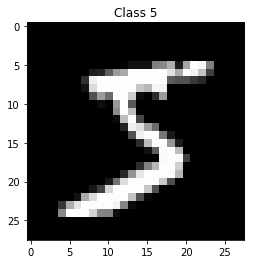

In [52]:
#224*224
#48*48

batch_size = 6000
num_classes = 10
epochs = 2000
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

shift = 0.2
gen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift,rotation_range=90,zca_whitening=True,featurewise_center=True, featurewise_std_normalization=True)

test_gen = ImageDataGenerator()

target_size=(224, 224, 3)

train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [53]:
input_shape = (28,28,1)

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),strides=(1,1),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 16, kernel_size = (3,3),strides=(1,1),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5),strides=(1,1),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),strides=(1,1),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),strides=(1,1),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),strides=(1,1),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(100, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_28 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 28, 28, 32)        12832     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 28, 28, 32)        25632     
__________

In [54]:



from matplotlib import pyplot as plt
history = model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)


10/10 [==============================] - 0s 40ms/step - loss: 0.1368 - acc: 0.9578 - val_loss: 0.0797 - val_acc: 0.9688
Epoch 362/2000
10/10 [==============================] - 0s 40ms/step - loss: 0.1512 - acc: 0.9547 - val_loss: 0.0406 - val_acc: 1.0000
Epoch 363/2000
10/10 [==============================] - 0s 40ms/step - loss: 0.1297 - acc: 0.9688 - val_loss: 0.1197 - val_acc: 0.9531
Epoch 364/2000
10/10 [==============================] - 0s 40ms/step - loss: 0.1163 - acc: 0.9578 - val_loss: 0.0776 - val_acc: 0.9688
Epoch 365/2000
10/10 [==============================] - 0s 39ms/step - loss: 0.1801 - acc: 0.9437 - val_loss: 0.0367 - val_acc: 1.0000
Epoch 366/2000
10/10 [==============================] - 0s 40ms/step - loss: 0.0969 - acc: 0.9688 - val_loss: 0.0292 - val_acc: 0.9844
Epoch 367/2000
10/10 [==============================] - 0s 40ms/step - loss: 0.2170 - acc: 0.9297 - val_loss: 0.2296 - val_acc: 0.9375
Epoch 368/2000
10/10 [==============================] - 0s 39ms/step -

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 4s 424ms/step - loss: 2.7400 - acc: 0.1719 - val_loss: 6.6538 - val_acc: 0.1094
Epoch 2/2000
10/10 [==============================] - 0s 39ms/step - loss: 2.1575 - acc: 0.2453 - val_loss: 5.8811 - val_acc: 0.2031
Epoch 3/2000
10/10 [==============================] - 0s 38ms/step - loss: 1.9108 - acc: 0.3172 - val_loss: 3.8299 - val_acc: 0.2188
Epoch 4/2000
10/10 [==============================] - 0s 39ms/step - loss: 1.8387 - acc: 0.3609 - val_loss: 3.0032 - val_acc: 0.2500
Epoch 5/2000
10/10 [==============================] - 0s 38ms/step - loss: 1.5798 - acc: 0.4813 - val_loss: 1.7926 - val_acc: 0.4062
Epoch 6/2000
10/10 [==============================] - 0s 38ms/step - loss: 1.4905 - acc: 0.4906 - val_loss: 2.5009 - val_acc: 0.4062
Epoch 7/2000
10/10 [==============================] - 0s 38ms/step - loss: 1.4776 - acc: 0.5078 - val_loss: 5.2784 - val_acc: 0.2500
Epoch 8/2000
10/10 [==============================] - 0s 39ms/step - loss: 1.2102

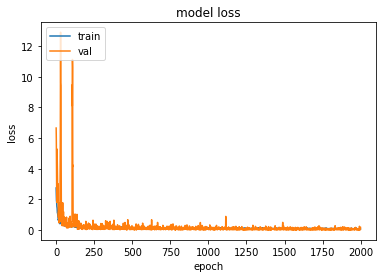

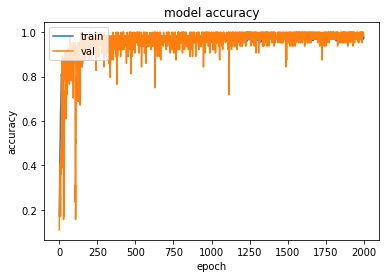

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)


epochs=10

model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)

model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)

model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)

model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)

10000/10000 [==============================] - 2s 166us/step

Test accuracy:  [0.04003220980940387, 0.9879]
Epoch 1/10
 3/10 [========>.....................] - ETA: 0s - loss: 0.1571 - acc: 0.9531

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 0s 42ms/step - loss: 0.0823 - acc: 0.9781 - val_loss: 0.0583 - val_acc: 0.9844
Epoch 2/10
10/10 [==============================] - 0s 40ms/step - loss: 0.0767 - acc: 0.9812 - val_loss: 0.0360 - val_acc: 0.9844
Epoch 3/10
10/10 [==============================] - 0s 41ms/step - loss: 0.0692 - acc: 0.9688 - val_loss: 0.0127 - val_acc: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 39ms/step - loss: 0.0917 - acc: 0.9750 - val_loss: 0.0323 - val_acc: 0.9844
Epoch 5/10
10/10 [==============================] - 0s 39ms/step - loss: 0.0732 - acc: 0.9719 - val_loss: 0.0914 - val_acc: 0.9688
Epoch 6/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0954 - acc: 0.9766 - val_loss: 0.0139 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 40ms/step - loss: 0.1130 - acc: 0.9672 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0913 - acc: 0.9781 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 0s 42ms/step - loss: 0.0823 - acc: 0.9781 - val_loss: 0.0583 - val_acc: 0.9844
Epoch 2/10
10/10 [==============================] - 0s 40ms/step - loss: 0.0767 - acc: 0.9812 - val_loss: 0.0360 - val_acc: 0.9844
Epoch 3/10
10/10 [==============================] - 0s 41ms/step - loss: 0.0692 - acc: 0.9688 - val_loss: 0.0127 - val_acc: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 39ms/step - loss: 0.0917 - acc: 0.9750 - val_loss: 0.0323 - val_acc: 0.9844
Epoch 5/10
10/10 [==============================] - 0s 39ms/step - loss: 0.0732 - acc: 0.9719 - val_loss: 0.0914 - val_acc: 0.9688
Epoch 6/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0954 - acc: 0.9766 - val_loss: 0.0139 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 40ms/step - loss: 0.1130 - acc: 0.9672 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0913 - acc: 0.9781 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 0s 44ms/step - loss: 0.0810 - acc: 0.9781 - val_loss: 0.0390 - val_acc: 0.9844
Epoch 2/10
10/10 [==============================] - 0s 39ms/step - loss: 0.0645 - acc: 0.9781 - val_loss: 0.0305 - val_acc: 0.9844
Epoch 3/10
10/10 [==============================] - 0s 38ms/step - loss: 0.1147 - acc: 0.9641 - val_loss: 0.0132 - val_acc: 0.9844
Epoch 4/10
10/10 [==============================] - 0s 37ms/step - loss: 0.0941 - acc: 0.9703 - val_loss: 0.0304 - val_acc: 0.9844
Epoch 5/10
10/10 [==============================] - 0s 39ms/step - loss: 0.0633 - acc: 0.9797 - val_loss: 0.1189 - val_acc: 0.9688
Epoch 6/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0717 - acc: 0.9703 - val_loss: 0.0432 - val_acc: 0.9844
Epoch 7/10
10/10 [==============================] - 0s 38ms/step - loss: 0.1152 - acc: 0.9672 - val_loss: 0.0387 - val_acc: 0.9844
Epoch 8/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0875 - acc: 0.9750 